## Some Napari Basics

The examples in this workshop make use of some of my personal 'helper' and 'widget' libraries.  These are all built on the concept of Napari ROIs, Layers and labelling tools.  

For those interested in starting to learn the Napari API and building your own 'helper' libraries, this notebook shows how to use these tools directly from Napari.

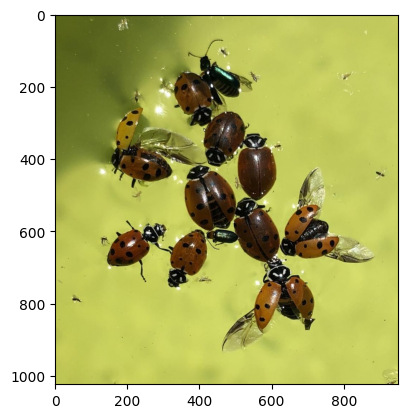

In [1]:
from skimage.io import imread
import os 
import napari
import matplotlib.pyplot as plt
import numpy as np

data_path = r'../../data'
parent_path = os.path.join(data_path, 'ladybugs_series')
img = imread(os.path.join(parent_path, '26638467_41374651.jpg'))
plt.imshow(img)


## Start Napari viewer and add several layers

In [5]:
viewer = napari.Viewer()

labels = np.zeros([img.shape[0], img.shape[1]], dtype=np.uint16)

viewer.add_image(img, name='ladybug')
viewer.add_labels(labels, name='labels')
rois_layer = viewer.add_shapes(face_color='transparent', edge_width=15, edge_color='blue', name='rois')

box = [[100,100], [100,500],[500,500], [500,100]]
rois_layer.add_rectangles(box)

## Create a Cellpose cyto3 model...

... and add a layer for Cellose results

In [6]:
from cellpose import models, io
model_cyto3 = models.CellposeModel(gpu=True, model_type="cyto3")

results = np.zeros([img.shape[0], img.shape[1]], dtype=np.uint16)
viewer.add_labels(results, name='cyto3 masks')

<Labels layer 'cyto3 masks' at 0x1d11026e920>

## Call Cellpose ...

... and update the Cellpose layer

In [ ]:
results = model_cyto3.eval(img, diameter=140)
viewer.layers['cyto3 masks'].data = results[0]

## Get the ROI and labels we drew in Napari

<class 'list'>
1
[[103.55742401  68.2272757 ]
 [103.55742401 717.98806052]
 [544.32298732 717.98806052]
 [544.32298732  68.2272757 ]]


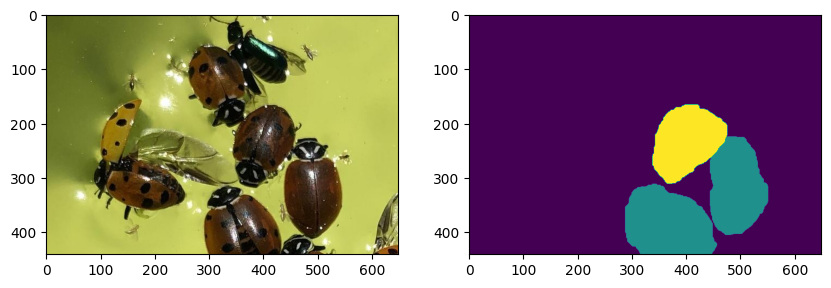

In [22]:
roi = viewer.layers['rois'].data

print(type(roi))
print(len(roi))
print(roi[0])

roi = np.array(roi[0], dtype=np.int16)

crop = img[ roi[0][0]:roi[2][0], roi[0][1]:roi[1][1]]
crop_label = labels[roi[0][0]:roi[2][0], roi[0][1]:roi[1][1]]
                    
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(crop)
plt.subplot(1,2,2)
plt.imshow(crop_label)
